Parte 4: Análisis de Métricas

1. Informe de Clasificación:


Generar un informe de clasificación para los modelos evaluados.


Incluir la matriz de confusión para una comprensión detallada de los errores de clasificación.


2. Curva ROC y AUC:


Crear y visualizar la curva ROC para los modelos de clasificación binaria.


Calcular el AUC para evaluar la capacidad del modelo para distinguir entre clases.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns

url = 'https://drive.google.com/uc?id=1lG4WZdJhHhvCR-a78ZvXBYB66gOKl47K&export=download'
df = pd.read_csv(url)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [ ]:
df['Day'] = df['Date'].dt.day# División de fecha por día
df['Month'] = df['Date'].dt.month # División de fecha por Mes

- Utilizar ColumnTransformer para aplicar transformaciones específicas a diferentes columnas.

In [ ]:
# Clasificación de valores
df['Nivel de venta'] = df['Total Amount'].apply(lambda x: 1 if x <= 200 else (2 if x > 201  and x <= 800 else 3))
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Day,Month,Nivel de venta
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,24,11,1
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,27,2,3
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,13,1,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,21,5,2
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,6,5,1


Se realiza la creación de la columna 'Nivel de venta' en la que se clasifica con base al monto del total de la venta si es '1' para baja, '2' para media y '3' para alta

Gráfico para distribución del 'target' (Nivel de venta).

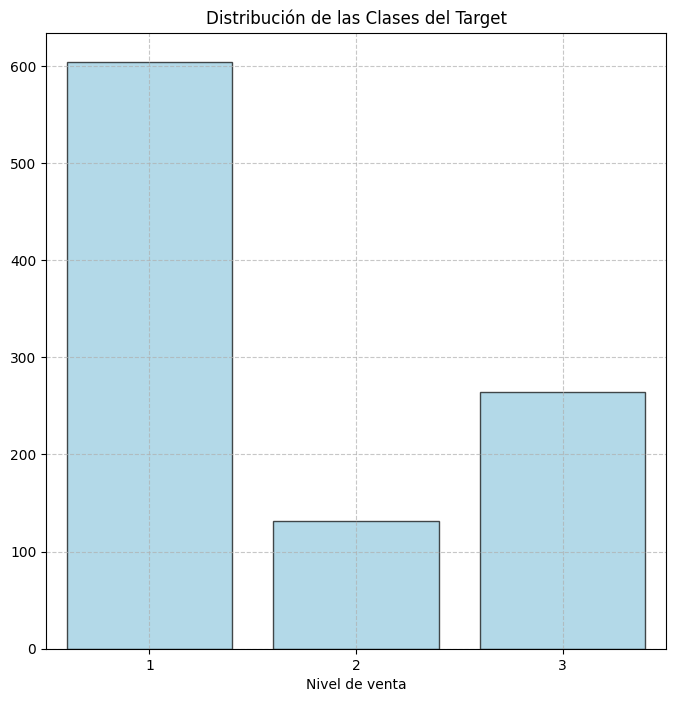

In [ ]:
# Ejemplo de visualización de distribución de las clases.
target = df['Nivel de venta'].value_counts()

# Visualización del conteo de cada categoría

Proporciones = target/ len(df)

# Visualizar del conteo de las categorías
# Generación de código para crear la figura
plt.figure(figsize=(8,8))
sns.barplot(x=target.index, y=target.values, color= 'skyblue', edgecolor= 'black', alpha= 0.7)
plt.title("Distribución de las Clases del Target")
plt.grid(True,  linestyle='--', alpha=0.7)
plt.show()

Se puede evidenciar una distribución bastante diferente de las categorías '1' para baja, '2' para media y '3' para venta alta.

Gráfico visualización de los niveles de venta.

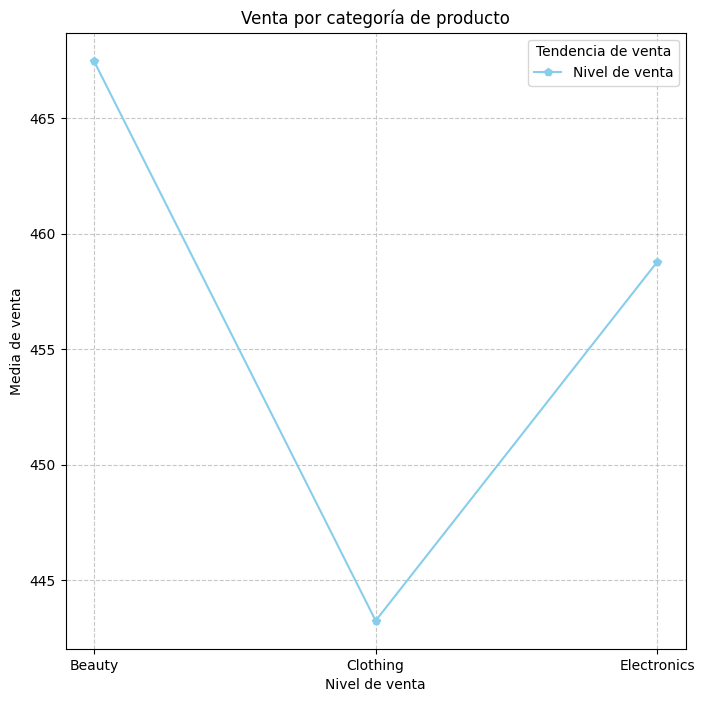

In [ ]:
# https://es.stackoverflow.com/questions/441521/generar-un-gr%C3%A1fico-de-lineas-con-matplotlib
# Información tomada de https://aprendeconalf.es/docencia/python/manual/matplotlib/
#https://matplotlib.org/stable/users/explain/quick_start.html#types-of-inputs-to-plotting-functions
#https://matplotlib.org/cheatsheets/cheatsheets.pdf
#https://codingdojolatam.la/cursos/data-science-fundamentals-julio-2024/leccion/visualizacion-para-ciencia-de-datos-analisis-exploratorio-de-datos-y-matplotlib-basico-2/


# Agrupación de Product Category con Total Amount.
grupo = df.groupby('Product Category')['Total Amount'].mean()

# Generación de código para crear la figura
plt.figure(figsize=(8,8))

# Creación del gráfico
plt.plot(grupo.index, grupo.values, label='Nivel de venta', marker= 'p', color= 'skyblue')

# Personalización del gráfico
plt.title('Venta por categoría de producto')
plt.xlabel('Nivel de venta')
plt.ylabel('Media de venta')
plt.legend(title='Tendencia de venta')
plt.grid(True,  linestyle='--', alpha=0.7)
plt.show()

Se puede apreciar la tendencia de venta en cada categoría, muy bajo para 'Clothing', seguido de 'Electronics' y liderando 'Beauty'.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Day               1000 non-null   int32         
 10  Month             1000 non-null   int32         
 11  Nivel de venta    1000 non-null   int64         
dtypes: datetime64[ns](1), int32(2), int64(6), object(3)
memory usage: 86.1+ KB


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve, roc_auc_score


In [ ]:
X = df.drop(['Nivel de venta', 'Date', 'Customer ID'], axis=1) # Se eliminan columnas que no son relevantes en la transformación de datos para implementar modelo.
y = df['Nivel de venta']

2. Pipelines:


- Crear pipelines para automatizar el preprocesamiento de datos y asegurar la reproducibilidad.

In [ ]:
#Preparación de datos: Divide los datos en un conjunto de entrenamiento (70%) y un conjunto de prueba (30%).
# Dividir los datos en conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 58)

In [ ]:
#Definir las columnas numéricas y categóricas.

numeric_features = [ 'Age', 'Quantity', 'Price per Unit', 'Day', 'Month', 'Total Amount']

categorical_features = [ 'Gender','Product Category']

# creación de un Pipeline para columnas numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= 'mean')), # relleno de faltantes si es que los hay
    ('scaler', StandardScaler()) # Escalado de las categorías numéricas
])



- Realizar codificación de variables categóricas y escalado de variables numéricas.

In [ ]:
# Creación de un Pipeline para columnas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= 'most_frequent')),
    ('nominal', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding de las categóricas
])

In [ ]:
# Usar ColumnTransformer para aplicar las transformaciones a las columnas correctas
preprocessor = ColumnTransformer(
    transformers=[
        ('numerica', numeric_transformer, numeric_features),
        ('categorica', categorical_transformer, categorical_features)
    ],
   remainder='passthrough', # Dejar columnas no transformadas
   n_jobs= -1,
    verbose= True,
    sparse_threshold= 0.3
)

preprocessor

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('numerica',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Quantity', 'Price per Unit', 'Day',
                                  'Month', 'Total Amount']),
                                ('categorica',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('nominal',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Gender', 'Product Category'])],
                  verbose=True)

Modelo KNN clasificación

In [ ]:
# Crear un pipeline que primero preprocesa los datos y luego ajusta el modelo para KNN
modelo_KNN = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=2))
])

In [ ]:
# Se ajustan los modelos de KNN
modelo_KNN.fit(X_train, y_train)

modelo_KNN

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('numerica',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Quantity',
                                                   'Price per Unit', 'Day',
                                                   'Month', 'Total Amount']),
                                                 ('categorica',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('nominal',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'Product Category'])],
                                   verbose=True)),
                ('classifier', KNeighborsClassifier(n_neighbors=2))])

In [ ]:
y_pred = modelo_KNN.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 2, 1, 1])

Evaluación de KNN

In [ ]:
exactitudKNN = accuracy_score(y_test, y_pred)

print(f'Exactitud: {exactitudKNN}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.64
Informe de Clasificación:
              precision    recall  f1-score   support

           1       0.65      0.94      0.77       180
           2       0.35      0.20      0.25        41
           3       0.82      0.18      0.29        79

    accuracy                           0.64       300
   macro avg       0.61      0.44      0.44       300
weighted avg       0.66      0.64      0.57       300



In [ ]:
matrix_confusionKNN = confusion_matrix(y_test, y_pred)

print('Matriz de Confusión:')
print(matrix_confusionKNN)

Matriz de Confusión:
[[170   8   2]
 [ 32   8   1]
 [ 58   7  14]]


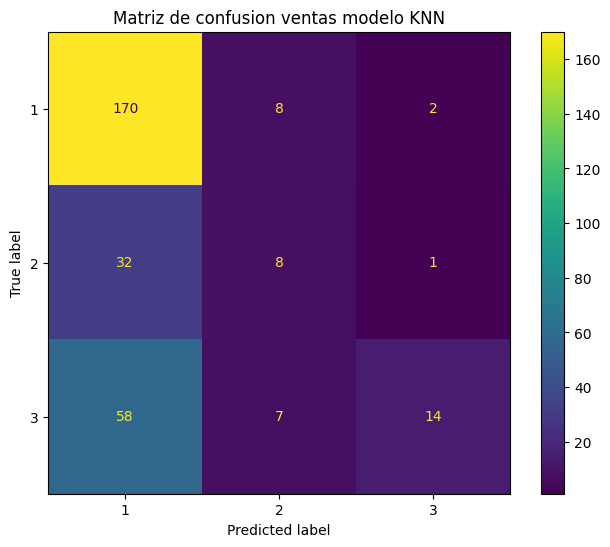

In [ ]:
cm2 = ConfusionMatrixDisplay(confusion_matrix=matrix_confusionKNN, display_labels=[1,2,3])
fig, ax=plt.subplots(figsize=(8,6))
cm2.plot(ax=ax)
plt.title('Matriz de confusion ventas modelo KNN')
plt.show()

Optimización de parámetros del modelo KNN

Mejor valor de K: 1


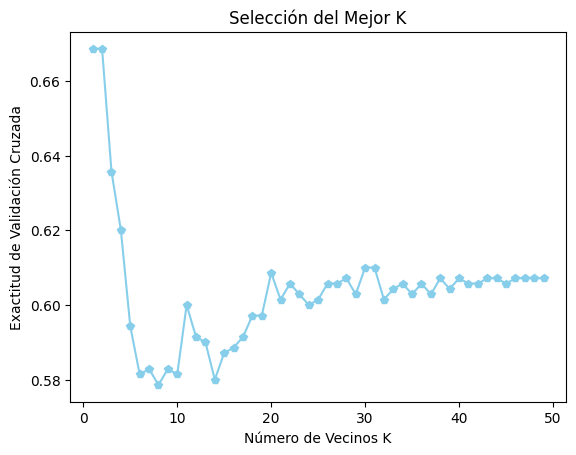

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Probar diferentes valores de K
k_values = range(1, 50)
cv_scores = []

for k in k_values:
    knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=k,
                                        weights='distance',  # Peso según la distancia
                                        algorithm='auto',    # Algoritmo de búsqueda
                                        p=2,                 # Distancia Euclidiana (Minkowski con p=2)
                                        metric='minkowski')) ])
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Seleccionar el K con la mayor exactitud
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f'Mejor valor de K: {optimal_k}')

# Gráfico de la exactitud en función de K
plt.plot(k_values, cv_scores, marker= 'p', color= 'skyblue')
plt.xlabel('Número de Vecinos K')
plt.ylabel('Exactitud de Validación Cruzada')
plt.title('Selección del Mejor K')
plt.show()


Al realizar la optimización de parámetros se puede identificar que le mejor valor de K es 1, esto siginifica que el modelo funciona adecuadamente con un sólo vecino.

Modelo de Regresión Logística

In [ ]:
# Crear un pipeline que primero preprocesa los datos y luego ajusta el modelo para Regresión Logística.
modelo_RegresionLogistica = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l2',           # Tipo de regularización L2 (Ridge)
C=1.0,                   # Inverso de la fuerza de regularización
solver='lbfgs',          # Algoritmo para la optimización
max_iter=100,            # Número máximo de iteraciones
tol=1e-4,                # Tolerancia para el criterio de parada
random_state=42))         # Semilla para la reproducibilidad
])

In [ ]:
# Entrenar el modelo Regresión Logística
modelo_RegresionLogistica.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('numerica',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Quantity',
                                                   'Price per Unit', 'Day',
                                                   'Month', 'Total Amount']),
                                                 ('categorica',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('nominal',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'Product Category'])],
                                   verbose=True)),
                ('classifier', LogisticRegression(random_state=42))])

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred1 = modelo_RegresionLogistica.predict(X_test)
y_pred1
y_prob = modelo_RegresionLogistica.predict_proba(X_test)
y_prob

array([[4.61242773e-02, 9.51916812e-01, 1.95891091e-03],
       [2.41838595e-05, 1.30156136e-01, 8.69819680e-01],
       [9.65225366e-01, 3.47717885e-02, 2.84529176e-06],
       [5.18503130e-03, 4.36756994e-02, 9.51139269e-01],
       [9.99052027e-01, 3.98222469e-04, 5.49750905e-04],
       [9.89467508e-01, 1.05317868e-02, 7.05492475e-07],
       [9.96107638e-01, 3.88726694e-03, 5.09466528e-06],
       [9.93558788e-01, 6.41929560e-03, 2.19164694e-05],
       [9.93665716e-01, 1.63189960e-03, 4.70238413e-03],
       [9.84058936e-01, 1.59396586e-02, 1.40572956e-06],
       [5.08296957e-02, 7.87823476e-01, 1.61346828e-01],
       [9.97247162e-01, 9.13502567e-04, 1.83933517e-03],
       [4.39347938e-05, 2.42592766e-04, 9.99713472e-01],
       [1.63039322e-03, 2.01261375e-02, 9.78243469e-01],
       [7.38577980e-03, 3.95499140e-02, 9.53064306e-01],
       [9.96199268e-01, 3.79566006e-03, 5.07178312e-06],
       [9.98670552e-01, 5.82076574e-04, 7.47371036e-04],
       [9.71740019e-01, 2.82574

Evaluación de Regresión Logística

In [ ]:
accuracy1 = accuracy_score(y_test, y_pred1)
print(f'Exactitud: {accuracy1}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred1))

Exactitud: 1.0
Informe de Clasificación:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       180
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        79

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [ ]:
# Matriz de Confusión
conf_matrixRLO = confusion_matrix(y_test, y_pred1)
print('Matriz de Confusión:')
print(conf_matrixRLO)

Matriz de Confusión:
[[180   0   0]
 [  0  41   0]
 [  0   0  79]]


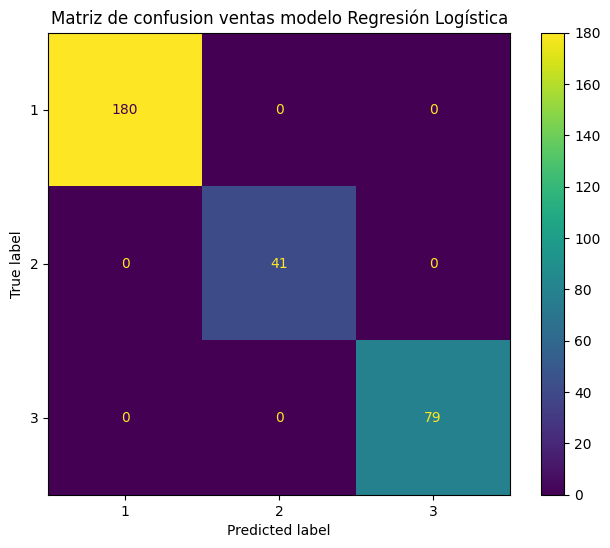

In [ ]:
cm2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrixRLO, display_labels=[1,2,3])
fig, ax=plt.subplots(figsize=(8,6))
cm2.plot(ax=ax)
plt.title('Matriz de confusion ventas modelo Regresión Logística')
plt.show()

Optimización del Modelo Regresión Logística.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de hiperparámetros
parametrosRL = {
    'classifier__C': [0.01, 0.1, 1.0, 10],  # C es el hiperparámetro de regularización de LogisticRegression
    'classifier__solver': ['liblinear', 'lbfgs'],  # Algoritmo de optimización
    'classifier__penalty': ['l2']  # Tipo de penalización
}

In [ ]:
# Crear el modelo de Regresión Logística
modeloRL = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())

])

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=modeloRL, param_grid=parametrosRL, scoring='accuracy', cv=5, n_jobs=-1)

# Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_predRL = best_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_predRL)
print(f'Exactitud del mejor modelo: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_predRL))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_predRL)
print('Matriz de Confusión:')
print(conf_matrix)

Mejores hiperparámetros encontrados:
{'classifier__C': 1.0, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Exactitud del mejor modelo: 1.0
Informe de Clasificación:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       180
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        79

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Matriz de Confusión:
[[180   0   0]
 [  0  41   0]
 [  0   0  79]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Los resultados para el modelo sin optimizar, el optimizado (Regresión Logística) es un indicativo de que el modelo a lo mejor se encuentre bien geenralizado, los datos de entrenamiento iniciales ya son lo suficientemente representativos del conjunto de prueba. Este proceso de validación cruzada es una prueba para de esta manera asegurar que el modelo funcione consistenmente bien en diversas particiones de los datos.


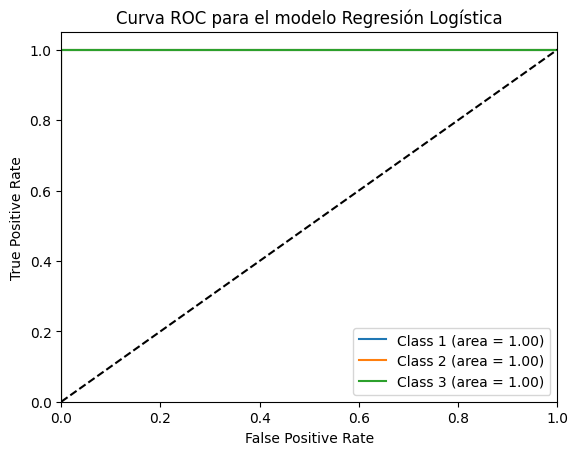

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score

# Definir los nombres de las clases
clases = [1, 2, 3]

# Binarizar las etiquetas de prueba
y_test_bin = label_binarize(y_test, classes=clases)

# Calcular las probabilidades de predicción

y_prob = modelo_RegresionLogistica.predict_proba(X_test)

# Calcular la curva ROC
# Calcular y plotear la curva ROC para cada clase
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {clases[i]} (area = %0.2f)' % auc)

# Plotear la curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para el modelo Regresión Logística')
plt.legend(loc="lower right")
plt.show()


Las curvas expresadas de la forma anterior son prueba de que el conjunto de datos es correcto, entonces es posible que el problema de clasificación sea sencillo y que el modelo logra clasficaciones perfectas.

Modelo de clasificación Random Forest Classifier

In [ ]:
# Crear un pipeline que primero preprocesa los datos y luego ajusta el modelo para Random Forest Classifier.
modelo_RF = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42) )
])

In [ ]:
# Entrenar el modelo Regresión Logística
modelo_RF.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('numerica',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Quantity',
                                                   'Price per Unit', 'Day',
                                                   'Month', 'Total Amount']),
                                                 ('categorica',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('nominal',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'Product Category'])],
                                   verbose=True)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_predRF = modelo_RF.predict(X_test)
y_predRF
y_probRF = modelo_RF.predict_proba(X_test)
y_probRF

array([[0.02, 0.93, 0.05],
       [0.01, 0.05, 0.94],
       [1.  , 0.  , 0.  ],
       [0.01, 0.06, 0.93],
       [0.99, 0.  , 0.01],
       [1.  , 0.  , 0.  ],
       [0.98, 0.01, 0.01],
       [1.  , 0.  , 0.  ],
       [0.99, 0.  , 0.01],
       [1.  , 0.  , 0.  ],
       [0.  , 0.92, 0.08],
       [1.  , 0.  , 0.  ],
       [0.  , 0.01, 0.99],
       [0.01, 0.  , 0.99],
       [0.02, 0.05, 0.93],
       [0.98, 0.01, 0.01],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.01, 0.  , 0.99],
       [0.01, 0.  , 0.99],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.01, 0.02, 0.97],
       [0.99, 0.  , 0.01],
       [0.  , 0.91, 0.09],
       [1.  , 0.  , 0.  ],
       [0.  , 0.03, 0.97],
       [0.  , 0.01, 0.99],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.02, 0.98],
       [0.  , 0.  , 1.  ],
       [0.99, 0.  , 0.01],
 

Evaluación de Random Forest Classifier

In [ ]:
accuracyRF = accuracy_score(y_test, y_predRF)
print(f'Exactitud: {accuracy1}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_predRF))

Exactitud: 1.0
Informe de Clasificación:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       180
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        79

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [ ]:
# Matriz de Confusión
conf_matrixRF = confusion_matrix(y_test, y_predRF)
print('Matriz de Confusión:')
print(conf_matrixRF)

Matriz de Confusión:
[[180   0   0]
 [  0  41   0]
 [  0   0  79]]


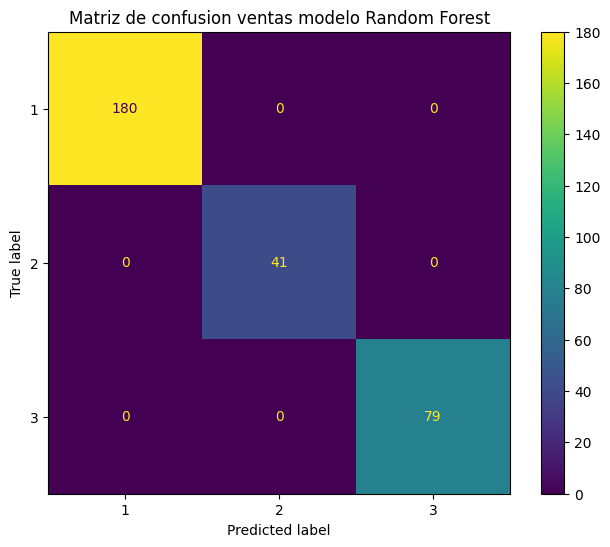

In [ ]:
cm2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrixRF, display_labels=[1,2,3])
fig, ax=plt.subplots(figsize=(8,6))
cm2.plot(ax=ax)
plt.title('Matriz de confusion ventas modelo Random Forest')
plt.show()

Optimización del modelo Random Forest Classifier

In [ ]:
# Optimización del modelo Random Forest

from sklearn.model_selection import GridSearchCV

# Crear un pipeline que primero preprocesa los datos y luego ajusta el modelo para Random Forest
modelo_RF1 =  Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Definir el grid de hiperparámetros para encontrar el que mejor modele el RF
param_RF = {
    'classifier__n_estimators': [50, 100, 200],  # Número de árboles
    'classifier__max_depth': [5, 10, 15],  # Profundidad máxima
}


In [ ]:
# Definir el GridSearchCV para el modelo RF
grid_RF = GridSearchCV(estimator= modelo_RF1, param_grid=param_RF, cv=5, n_jobs=-1, verbose=2)

# Ajustar el grid search a los datos de entrenamiento
grid_RF.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='passthrough',
                                                          transformers=[('numerica',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Quantity',
                                                                          'Price '
                                                                          'per '
                                                                          'Unit',
                                                                          'Day',
                                                                          'Month',
                                                                          'Total '
                                                                          'Amount']),
                                                                        ('categorica',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('nominal',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Product '
                                                                          'Category'])],
                                                          verbose=True)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [5, 10, 15],
                         'classifier__n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_RF.best_params_)

# Usar el mejor modelo para hacer predicciones del modelo
best_rf = grid_RF.best_estimator_
y_pred_RFop = best_rf.predict(X_test)

# Evaluar el rendimiento del modelo RF
print(classification_report(y_test, y_pred_RFop))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred_RFop)
print('Matriz de Confusión:')
print(conf_matrix)

Mejores hiperparámetros: {'classifier__max_depth': 5, 'classifier__n_estimators': 50}
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       180
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        79

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Matriz de Confusión:
[[180   0   0]
 [  0  41   0]
 [  0   0  79]]


Los resultados similares entre el modelo con y sin optimización sugieren que los datos no contienen mucha variabilidad o complejidad, no puede indicar que el modelo tiene la capacidad de capturar los patrones importantes de los datos.

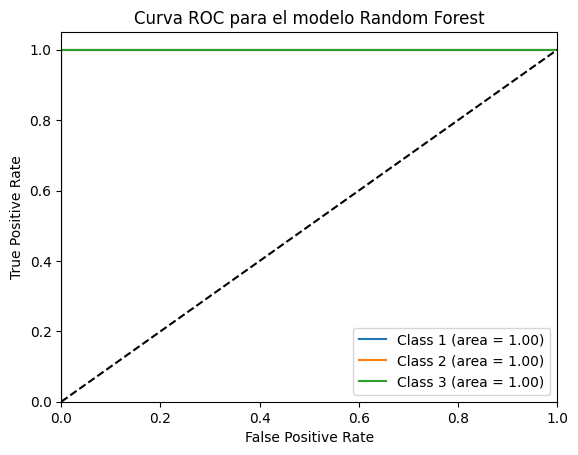

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score

# Definir los nombres de las clases
clases = [1, 2, 3]

# Binarizar las etiquetas de prueba
y_test_bin = label_binarize(y_test, classes=clases)

# Calcular las probabilidades de predicción

y_probRF = modelo_RF.predict_proba(X_test)

# Calcular la curva ROC
# Calcular y plotear la curva ROC para cada clase
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probRF[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_probRF[:, i])
    plt.plot(fpr, tpr, label=f'Class {clases[i]} (area = %0.2f)' % auc)

# Plotear la curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para el modelo Random Forest')
plt.legend(loc="lower right")
plt.show()

Las curvas expresadas de la forma anterior son prueba de que el conjunto de datos es correcto, entonces es posible que el problema de clasificación sea sencillo y que el modelo logra clasficaciones perfectas.